Exercises and code samples for the course Unsupervised and Reinforcement Learning (AAI-URL) in the Bachelor of AAI at Rosenheim University of Applied Sciences.


Credits to https://betterdatascience.com/implement-convolutions-from-scratch-in-python/

# How Convolution Works

Convolutional neural networks are a special type of neural network used for image classification. At the heart of any convolutional neural network lies convolution, an operation highly specialized at detecting patterns in images.

Convolutional layers require you to specify the number of filters (kernels). Think of these as a number of pattern detectors. Early convolutional layers detect basic patterns, such as edges, corners, and so on. Specialized patterns are detected at later convolutional layers, such as dog ears or cat paws, depending on the dataset.

A single filter is just a small matrix (usually rectangular). It’s your task to decide on the number of rows and columns, but 3x3 or 5x5 are good starting points. Values inside the filter matrix are initialized randomly. The task of a neural network is to learn the optimal values for the filter matrix, given your specific dataset.

Let’s take a look at a convolution operation in action. We have a 5x5 image and a 3x3 filter. The filter slides (convolves) over every 3x3 set of pixels in the image, and calculates an element-wise multiplication. The multiplication results are then summed:

![](./img/ipynb_cnn.png)

# Implement Convolution From Scratch

Applying a convolution to an image will make it smaller (assuming no padding). How much smaller depends on the filter size. All of ours are 3x3, but you can go larger.

Sliding, or convolving a 3x3 filter over images means we’ll lose a single pixel on all sides (2 in total). For example, sliding a 3x3 filter over a 224x224 image results in a 222x222 image. Likewise, sliding a 5x5 filter over the same image results in a 220x220 image.

The following formular should reflect the total numbers of the resulting matrix:

![](./img/total_numbers.png)

We’ll declare a helper function to calculate the image size after applying the convolution. It’s nothing fancy, but will make our lives a bit easier. It basically calculates how many windows of the filter size you can fit to an image (assuming square image):

In [1]:
def calculate_target_size(img_size: int, kernel_size: int, padding =0, s=1) -> int:
          
    return (int)((img_size+ 2* padding - kernel_size)/s) +1

print(calculate_target_size(224, 3))
print(calculate_target_size(224, 5))
print(calculate_target_size(6, 2))
print(calculate_target_size(6, 3))
print(calculate_target_size(6, 4))

222
220
5
4
3


Here’s what a 3x3 filter does to a single 3x3 image subset:

- Extracts it to a separate matrix
- Does an element-wise multiplication between the image subset and the filter
- Sums the results

Here’s an implementation in code for a single 3x3 pixel subset:

In [2]:
import numpy as np

img = np.arange(36)
img = np.reshape(img, [6,6])
print(img)

sub = np.array(img)[0:0+3, 0:0+3]
print(sub)

sub = np.array(img)[0:0+3, 1:1+3]
print(sub)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
[[ 0  1  2]
 [ 6  7  8]
 [12 13 14]]
[[ 1  2  3]
 [ 7  8  9]
 [13 14 15]]


In [3]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

r = np.multiply(sub, sharpen)

print(r)

s = np.sum(r)

print(s)

[[  0  -2   0]
 [ -7  40  -9]
 [  0 -14   0]]
8


OK, now convert all into a function:

In [4]:
def convolve(img, kernel) -> np.array:
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

Let's have a quick test:

In [5]:
img_sharpened = convolve(img=np.array(img), kernel=sharpen)
print(img_sharpened)

[[ 7.  8.  9. 10.]
 [13. 14. 15. 16.]
 [19. 20. 21. 22.]
 [25. 26. 27. 28.]]


# Load and display image

Let's write some helper functions to display an image.

In [6]:
# Load and display images
# foto taken from pixabay

import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');

def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

img = Image.open('./lotus.jpg')
img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))
plot_image(img=img)


FileNotFoundError: [Errno 2] No such file or directory: './lotus.jpg'

# Test the sharpen filter with our image

Use the flower image and appply the sharpen filter

[[17. 19. 17. ... 81. 81. 83.]
 [22. 16. 22. ... 82. 83. 84.]
 [19. 22. 19. ... 84. 84. 86.]
 ...
 [38. 37. 42. ... 15. 15. 16.]
 [42. 41. 40. ... 15. 16. 17.]
 [37. 41. 40. ... 16. 12. 13.]]


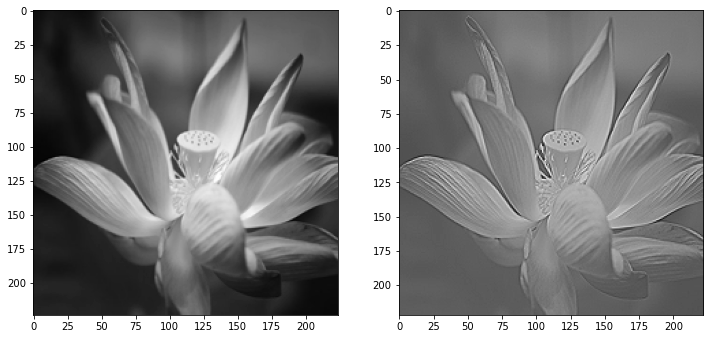

In [9]:
img_sharpened = convolve(img=np.array(img), kernel=sharpen)
print(img_sharpened)

plot_two_images(
    img1=img, 
    img2=img_sharpened
)

# Some more filter

Just blur an image with:

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
]

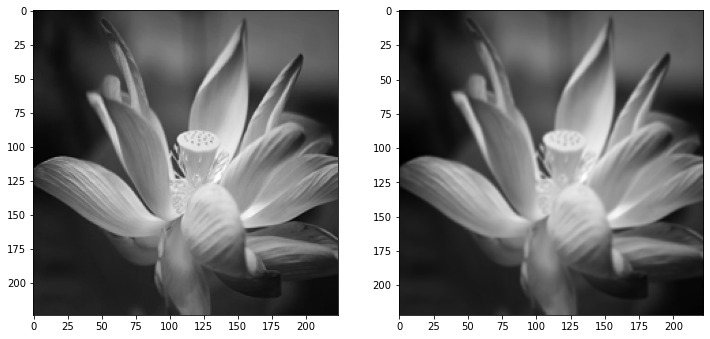

In [10]:
blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

img_blured = convolve(img=np.array(img), kernel=blur)

plot_two_images( img1=img, img2=img_blured)

# finally, a filter for edge detection

Here is a filter to outline edges:

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

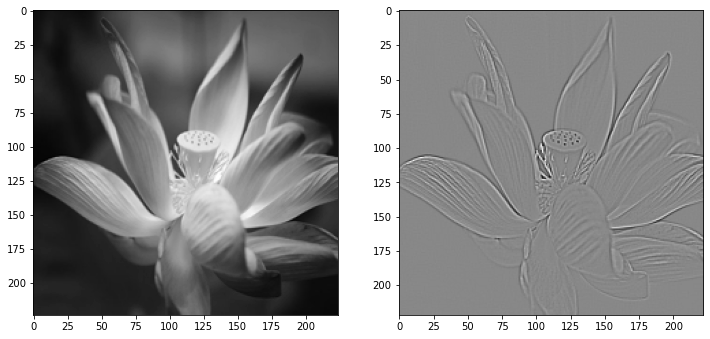

In [11]:
outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

img_outlined = convolve(img=np.array(img), kernel=outline)

plot_two_images( img1=img, img2=img_outlined)